# Mini Project Chapter 4 - Exploratory Data Analysis

## Task:

-  The median price paid by the customer for each payment method.
    - 各支払方法において、顧客が支払った価格の中央値。
-  Determine the payment method that has the largest basket size (mean median price).
    - バスケットサイズ（中央値の平均値）が最も大きい決済方法を決定する。
-  Change freight_value to shipping_cost and find the most expensive shipping_cost from the sales data using sort.
    - freight_value を shipping_cost に変更し、sort で売上データから最も高い shipping_cost を求める。
-  For each product_category_name, what is the average weight of the product and which standard deviation is the smallest from that weight,
    - Product_category_nameごとに、その商品の平均重量と、その重量から最も小さい標準偏差はどれか。
-  Create a sales quantity histogram from the dataset to see the distribution of the sales quantity with bins = 5 and figsize = (4,5)
    - データセットから販売数量ヒストグラムを作成し、販売数量の分布を見る。ビン = 5、figsize = (4,5) 各支払方法について、顧客が支払った価格の中央値。

### Importing Libraries

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### Retrieving The Dataset

In [2]:
order_df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/order.csv")
order_df

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-03,e-wallet,fashion,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,ec88157ad03aa203c3fdfe7bace5ab6b,1,165f86fe8b799a708a20ee4ba125c289,3077000,7ddcbb64b5bc1ef36ca8c151f6ec77df,172000,1642b8087a8ca0c8592becff7e183c98,delivered,2017-12-15,e-wallet,automotive,2425.0
49995,ed60085e92e2aa3debf49159deb34da7,1,6e835aea84ae8eb68b8c14878dd43b30,1277000,4d6d651bd7684af3fffabd5f08d12e5a,130000,431bbb57d52f3141ab2f33a6a4cf00a6,delivered,2017-12-15,debit card,beauty,2350.0
49996,ed98c37d860890f940e2acd83629fdd1,2,aca2eb7d00ea1a7b8ebd4e68314663af,486000,955fee9216a65b617aa5c0531780ce60,14000,71f8cd490677ee95362201588c0eaff4,delivered,2017-12-15,debit card,gadget,2600.0
49997,ed98c37d860890f940e2acd83629fdd1,1,aca2eb7d00ea1a7b8ebd4e68314663af,830000,955fee9216a65b617aa5c0531780ce60,108000,71f8cd490677ee95362201588c0eaff4,delivered,2017-12-15,e-wallet,gadget,2600.0


In [3]:
# The median price paid by the customer for each payment method.
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)

payment_type
credit card        2587500.0
debit card         2621500.0
e-wallet           2589000.0
virtual account    2643000.0
Name: price, dtype: float64


In [4]:
# Change freight_value to shipping_cost and find the most expensive shipping_cost from the sales data using sort.
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
print(sort_value)

                               order_id  quantity  \
23829  7d63cb1d349e7bd0ee1edcc61ea71077         1   
12011  00c9f7d4b0e87781465e562dc109f6aa         1   
10984  69013d19f8db4cd7dc9f3b5c2564a96f         1   
29722  f32c4d2b078bc5a354f4c1184522b5ff         1   
15259  c8eab0ccabe8cdfc2afce66c1c554ae2         1   
...                                 ...       ...   
2891   1d0e8770169496e47622b6cbc0d10bda         1   
36815  4bff82a994068f564e54b52b08ef4512         2   
8175   e6b1fa22555c3064f984ebeb8a88de77         1   
4034   8ac2728285fd4228f35d907768b5288a         4   
32994  0286e258217733541e80588e29c208c1         1   

                             product_id    price  \
23829  75d6b6963340c6063f7f4cfcccfe6a30  1472000   
12011  1a0d662b65b5ef08796501b064c853af  4543000   
10984  10d196ec072e2d8382c7ec9c942d7ea8  4137000   
29722  0f789be671fe3bd93cabfbb4a710f282  4802000   
15259  800f75019492a0d9ffb2483ae65b59f1  4078000   
...                                 ...      ...   

In [5]:
# For category_name products, what is the average weight of the product and which standard deviation is the smallest from that weight,
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value.sort_values())
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value.sort_values())

product_category_name
beauty         2120.088396
automotive     2129.559039
electronics    2144.751191
toys           2203.863643
gadget         2229.632942
fashion        2246.516901
sports         2251.879909
utilities      2291.029868
Name: product_weight_gram, dtype: float64
product_category_name
automotive     3799.884166
beauty         3837.474929
electronics    3839.271768
fashion        3858.885213
gadget         3955.792741
toys           3956.814749
sports         4032.850044
utilities      4150.509909
Name: product_weight_gram, dtype: float64


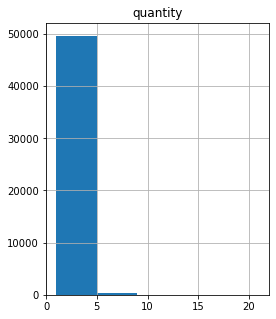

In [6]:
# Create a sales quantity histogram from the dataset to see the distribution of the sales quantity with bins = 5 and figsize = (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=5)
plt.show()